In [1]:
# fmt: off
%matplotlib inline
%config InlineBackend.figure_format = "retina"
%load_ext autoreload
%load_ext lab_black
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pickle
from mls_scf_tools.mls_pint import ureg
plt.style.use("mls_scf")
def vdir(obj):
    return [x for x in dir(obj) if not x.startswith('__')]
# fmt: on

In [2]:
%autoreload 2

In [3]:
import dualpy as dp

In [4]:
z = np.linspace(-10, 10, 201) * ureg.dimensionless
z = dp.seed(z, "z")

In [5]:
hundredths = ureg.cm / ureg.m
zz = z.to(hundredths)

In [6]:
print(z.units)
print(zz.units)

dimensionless
centimeter / meter


In [7]:
w = dp.wofz(z)
ww = dp.wofz(zz)

/users/livesey/python/dualpy/dualpy/dual_pint.py:41: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.array(self.variable, dtype=dtype)
/users/livesey/python/dualpy/dualpy/dual_pint.py:41: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.array(self.variable, dtype=dtype)


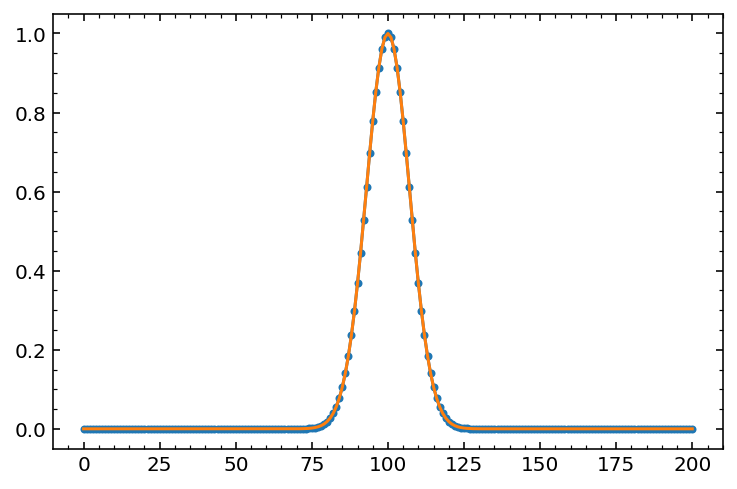

In [8]:
plt.plot(w, marker=".")
plt.plot(ww)

In [9]:
j = w.jacobians["z"].extract_diagonal()
jj = ww.jacobians["z"].extract_diagonal()

/users/livesey/.conda/envs/njl-base-3.10-02dec22/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/users/livesey/.conda/envs/njl-base-3.10-02dec22/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


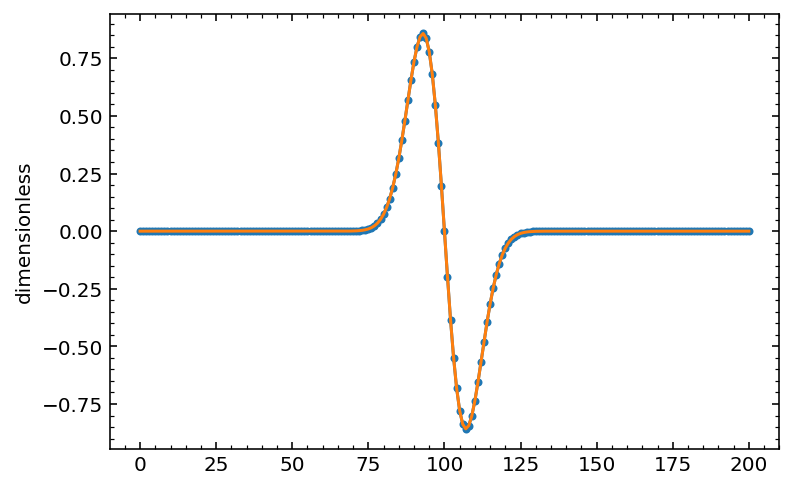

In [10]:
plt.plot(j, marker=".")
plt.plot(jj)

In [11]:
x = np.linspace(-10, 10, 201) * ureg.MHz
sigma = 1.0 * ureg.MHz
gamma = 0.001 * ureg.MHz

In [12]:
x = dp.seed(x, "x")
sigma = dp.seed(sigma, "sigma")
gamma = dp.seed(gamma, "gamma")

In [13]:
xx = x.to(ureg.kHz)

In [14]:
v = dp.voigt_profile(x, sigma, gamma)
vv = dp.voigt_profile(xx, sigma, gamma)

In [15]:
jx = v.jacobians["x"].extract_diagonal().to_base_units()
js = v.jacobians["sigma"].todensearray().squeeze().to_base_units()
jg = v.jacobians["gamma"].todensearray().squeeze().to_base_units()

In [16]:
jjx = vv.jacobians["x"].extract_diagonal().to_base_units()
jjs = vv.jacobians["sigma"].todensearray().squeeze().to_base_units()
jjg = vv.jacobians["gamma"].todensearray().squeeze().to_base_units()

In [17]:
print(v.jacobians["gamma"])
print(v.jacobians["gamma"].data[0])
print()
print(vv.jacobians["gamma"])
print(vv.jacobians["gamma"].data[0])

Jacobian of type <class 'dualpy.dense_jacobians.DenseJacobian'>
Dependent shape is (201,) <201>
Independent shape is () <1>
Combined they are (201,) <201>
Dummies are (1,) and ()
Units are d<1 / megahertz>/d<megahertz> = <1 / megahertz ** 2>
data is (201,)
data2d is (201, 1)
0.003283734492594494

Jacobian of type <class 'dualpy.dense_jacobians.DenseJacobian'>
Dependent shape is (201,) <201>
Independent shape is () <1>
Combined they are (201,) <201>
Dummies are (1,) and ()
Units are d<1 / megahertz>/d<megahertz> = <1 / megahertz ** 2>
data is (201,)
data2d is (201, 1)
0.0032837344925938676


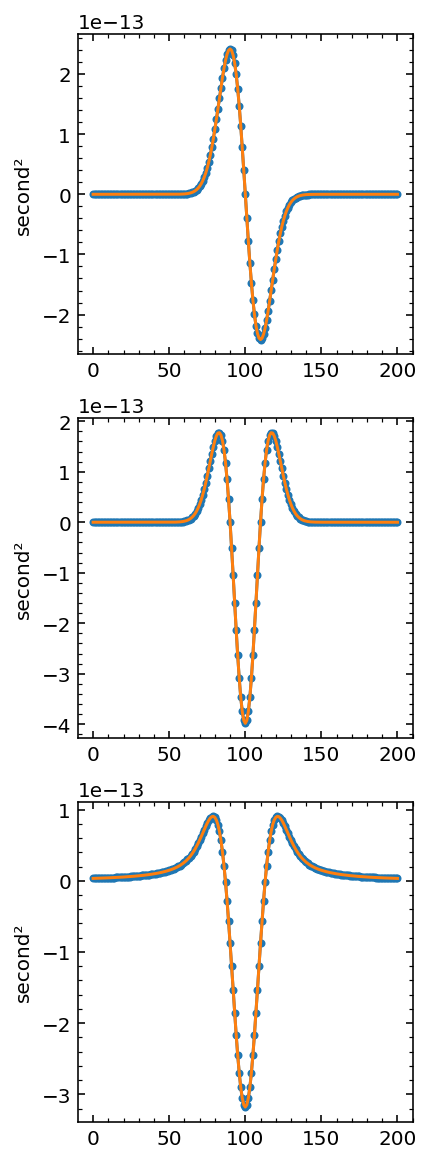

In [18]:
fig, ax = plt.subplots(3, figsize=(3, 10))
ax[0].plot(jx, marker=".")
ax[0].plot(jjx)
#
ax[1].plot(js, marker=".")
ax[1].plot(jjs)
#
ax[2].plot(jg, marker=".")
ax[2].plot(jjg)